<p align="center">
  <img src="https://www.meetup.com/_next/image/?url=https%3A%2F%2Fsecure-content.meetupstatic.com%2Fimages%2Fclassic-events%2F506743465%2F676x380.webp&w=2048&q=75" alt="Plotnine Workshop"/>
</p>

<center><h1>Plotnine Workshop</h1></center>
<center><h6>This workshop is brought to you by R-Ladies (Cologne, Paris) and PyLadies (Tunis, Munich). Workshop content created by Tanya Shapiro. </h6></center>

---

**Agenda**

In today's workshop, we'll explore how to create and style plots using **plotnine** in Python. This workbook is divided into 5 sections:

1. Set-Up 
2. Data Prep
3. Plot 1: Bar
4. Plot 2: Scatter
5. Plot 3: Density & Facetting

**About The Data** 

The dataset we'll be using comes from the **[TidyTuesday](https://github.com/rfordatascience/tidytuesday)** community. The data is sourced from the [**Open-Source Psychometrics Project**](https://openpsychometrics.org/) and contains personality assessments of different characters in pop culture (e.g. characters from Friends, Westworld, Marvel, etc).



#1. Set Up
---

## 1.1. Download & Import Packages
We will use the following packages listed below. If you do not have them currently installed, run the segment of code with `!pip install` to download them.

In [ ]:
#install packages
!pip install pandas
!pip install numpy 
!pip install plotnine
!pip install matplotlib
#if not running on Google Colab, import wget to run fun font functions
#!brew install wget

In [16]:
#for data wrangling
import pandas as pd
import numpy as np
#for plotting 
from plotnine import *
#to add different fonts
from matplotlib import font_manager as fm

##1.2. Downloading Fonts


To change out our fonts, we will use `matplotlib.font_manager` to add font libraries we can use later for our plots. Since we are working in Google Colab and not our local directory, we'll download and then add them. Font files are downloaded directly from **[Google's GitHub](https://github.com/google/fonts)**.

The following trick was used from a [StackOverflow post](https://stackoverflow.com/questions/51810908/custom-fonts-in-google-colaboratory-matplotlib-charts).

If you work in Jupyter Notebook files, you can use a similar method to add fonts from your local directory.

In [ ]:
#if not running on Googlge Colab, uncomment import
#import wget
!wget 'https://github.com/google/fonts/raw/main/ofl/chivo/Chivo-Regular.ttf'
!wget 'https://github.com/google/fonts/raw/main/ofl/chivo/Chivo-Regular.ttf'
!wget 'https://github.com/google/fonts/raw/main/ofl/chivo/Chivo-Bold.ttf'
!wget 'https://github.com/google/fonts/raw/main/ofl/chivo/Chivo-Light.ttf'

In [18]:
font_files = fm.findSystemFonts('.')

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
  print(font_file)
  fm.fontManager.addfont(font_file)

/Users/tanyashapiro/Desktop/job-search/cv-tanya-shapiro_files/font-awesome-5.1.0/webfonts/fa-brands-400.ttf
/Users/tanyashapiro/Desktop/Chivo-Light.ttf
/Users/tanyashapiro/Desktop/Code/p-resume_files/font-awesome-5.1.0/webfonts/fa-regular-400.ttf
/Users/tanyashapiro/Desktop/Chivo-Bold.ttf
/Users/tanyashapiro/Desktop/Chivo-Regular.ttf
/Users/tanyashapiro/Desktop/job-search/cv-tanya-shapiro_files/font-awesome-5.1.0/webfonts/fa-solid-900.ttf
/Users/tanyashapiro/Desktop/Code/p-resume_files/font-awesome-5.1.0/webfonts/fa-solid-900.ttf
/Users/tanyashapiro/Desktop/Code/p-resume_files/font-awesome-5.1.0/webfonts/fa-brands-400.ttf
/Users/tanyashapiro/Desktop/job-search/cv-tanya-shapiro_files/font-awesome-5.1.0/webfonts/fa-regular-400.ttf


#2. Data Prep
---

##2.1. Read & Explore
We'll use **[pandas](https://pandas.pydata.org/docs/getting_started/index.html)** to read our csv data file and reshape it to make sure it's ready for plotting. For R users, think of pandas as dplyr, with this tool we can filter, slice, subset, and merge dataframe objects.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/tashapiro/open-psychometrics/main/data/psych_stats.csv')
#get first 5 records to preview - alternatively, we can use .tail() for last records or .sample() for random record sampling
df.head(5)

,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
0,F2,Monica Geller,F,Friends,messy/neat,neat,95.7,9,11.7,1079
1,F2,Monica Geller,F,Friends,disorganized/self-disciplined,self-disciplined,95.2,27,11.2,1185
2,F2,Monica Geller,F,Friends,diligent/lazy,diligent,93.9,87,10.4,1166
3,F2,Monica Geller,F,Friends,on-time/tardy,on-time,93.8,34,14.3,236
4,F2,Monica Geller,F,Friends,competitive/cooperative,competitive,93.6,56,13.4,1168


Other pandas functions to explore our dataframe include:

In [25]:
#how many rows and columns?
#df.shape

#overview by column: non-null count & data types
#df.info()

#get descriptive statistics for numeric cols - mean, std, min, quartiles, max
df.describe()

,avg_rating,rank,rating_sd,number_ratings
count,356489.000000,356489.000000,356489.000000,356489.000000
mean,68.440772,537.315769,25.357201,131.036789
std,11.425099,373.145307,5.995485,185.824518
min,50.100000,1.000000,0.000000,3.000000
25%,58.700000,225.000000,21.800000,28.000000
50%,67.400000,483.000000,26.200000,58.000000
75%,77.100000,793.000000,29.600000,142.000000
max,100.000000,1901.000000,46.700000,2940.000000


## 2.2. Clean & Reshape Data

Before we can plot our data, we'll need to clean up our data.

*   Subset our data to focus on a few characteristics
*   Adjust the `avg_rating` so it's scale 0 to 100
*   Pivot our data so characteristic ratings are stored as columns

### 2.2.1. Subsetting Data

In [26]:
#create list of questions to focus on, there are ~400 to choose from!
questions = ['optimistic/pessimistic','bold/shy','diligent/lazy','messy/neat','dunce/genius','altruistic/selfish',
             'foolish/wise','dominant/submissive','cunning/honorable']

#create a subset of the dataframe - only include assessments within our question list. only include char_name, uni_name, question, personality, and avg_rating
subset = df[df['question'].isin(questions)]
subset = subset[['char_name','uni_name','question','personality','avg_rating']]

subset.head(7)

,char_name,uni_name,question,personality,avg_rating
0,Monica Geller,Friends,messy/neat,neat,95.7
2,Monica Geller,Friends,diligent/lazy,diligent,93.9
32,Monica Geller,Friends,dominant/submissive,dominant,86.4
158,Monica Geller,Friends,bold/shy,bold,71.8
188,Monica Geller,Friends,foolish/wise,wise,69.6
191,Monica Geller,Friends,dunce/genius,genius,69.2
301,Monica Geller,Friends,cunning/honorable,honorable,58.8


###2.2.2. Cleaning Up Data

In [27]:
subset[subset.question=='messy/neat'].head(5)

,char_name,uni_name,question,personality,avg_rating
0,Monica Geller,Friends,messy/neat,neat,95.7
556,Rachel Green,Friends,messy/neat,messy,69.8
1108,Chandler Bing,Friends,messy/neat,messy,54.7
1250,Joey Tribbiani,Friends,messy/neat,messy,87.0
1731,Phoebe Buffay,Friends,messy/neat,messy,79.1


In [28]:
#break up question to show both ends of spectrum, use string split with the / delimiter
subset[['outcome_1','outcome_2']]= subset['question'].str.split('\/', expand=True)

#create new column based on if/then condition with numpy. if outcome_1 is the same as personality, use rating, else 100- rating
subset['rating'] = np.where(subset['outcome_1'] == subset['personality'], subset['avg_rating'], 100-subset['avg_rating'])

subset.head(3)

,char_name,uni_name,question,personality,avg_rating,outcome_1,outcome_2,rating
0,Monica Geller,Friends,messy/neat,neat,95.7,messy,neat,4.3
2,Monica Geller,Friends,diligent/lazy,diligent,93.9,diligent,lazy,93.9
32,Monica Geller,Friends,dominant/submissive,dominant,86.4,dominant,submissive,86.4


###2.2.3. Pivoting Data 

In [29]:
pivoted = subset[['char_name','uni_name','outcome_1','rating']]
pivoted = pivoted.pivot(index=['char_name','uni_name'], columns='outcome_1', values='rating').reset_index()
pivoted.head(3)

outcome_1,char_name,uni_name,altruistic,bold,cunning,diligent,dominant,dunce,foolish,messy,optimistic
0,A-Train,The Boys,8.5,82.6,82.6,42.5,46.5,82.9,86.5,77.2,38.8
1,A.J. Soprano,The Sopranos,28.0,51.8,57.2,18.5,31.4,79.6,84.0,84.1,17.8
2,Aang,Avatar: The Last Airbender,88.7,71.9,16.3,66.6,41.0,44.8,45.3,68.4,92.1


# What is Plotnine?
---

Plotnine is a data visualization package for Python created by **Hassan Kibirge** and is based on **[R ggplot2](https://ggplot2.tidyverse.org/)** . 

Like **seaborn**, plotnine was built using **matplotlib** as the plotting backbone. The package implements ***grammar of graphics*** that is very similar to ggplot2!

The developer has some great documentation [here](https://plotnine.readthedocs.io/en/stable/). And for those who want to check under the hood, you can take a look at the code directly on Kibirge's [GitHub](https://github.com/has2k1/plotnine).

## The Building Blocks 


* **ggplot** - how we initialize the ggplot object, optional to include data and mapping here (acts as the parent for future geoms).

* **Geom Layers** - the component to our plot. We can specify type with different [geom functions](https://plotnine.readthedocs.io/en/stable/api.html#geoms), e.g. for a scatter plot we’ll use `geom_point() `and for a bar chart we can use `geom_col()` or `geom_bar()`.

* **Aes** - aesthetic mapping of data variables to visual properties (e.g. x, y, color, size) in our plot. Set in `ggplot()` or individual geom layers.

* **Scales** - fine tuning the details of our plots, e.g. tweaking axis limits, axis labels, color values, etc.

* **Labs** - plot labelling, e.g. plot title and axis labels

* **Themes** - how we can adjust the look, feel, and overall style of our plot. There are [out of the box theme options](https://plotnine.readthedocs.io/en/stable/api.html#themes), e.g. `theme_bw()` or we can create our custom theme using `theme()` and modify components within the function.





# 3. Bar Plot
---

## 3.1. Basic Bar Plot

Let's start with a basic plot bar plot using `geom_col`. How **messy** are the characters from Friends?

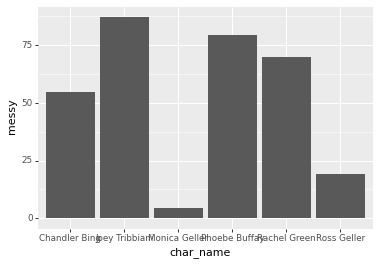

<ggplot: (393068535)>

In [30]:
#create new dataframe object from our pivoted dataframe to show Friends universe
friends = pivoted[pivoted['uni_name']=="Friends"]

#create basic ggplot column graph
(ggplot(data=friends, mapping=aes(x='char_name',y='messy'))+
 geom_col()+
 #adjust figure size with theme
 theme(figure_size=[8,6])
 )

## 3.2. Next Level Bar Plot

We now have a basic bar plot. No surprise that **Monica Geller** is the neatest while **Joey Tribbiani** is rated as the messiest out of the group!

<img src="https://miro.medium.com/max/500/0*ZlYIzfsxW0sEHlnh" width=400 />
<img src="https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/08/30/09/joey.jpg?width=1200" width=400 />


Let's make it better with a few tweaks:

- Reorder the bar graph to show it in order of `messy` value, use the `reorder()` function within the aesthetic mapping for x
- Add the values as text outside of each bar with `geom_text`
- Change the axis labels and give the plot a title with ggplot `labs`
- Change the `fill` color in `geom_col` (grey is underwhelming!) 

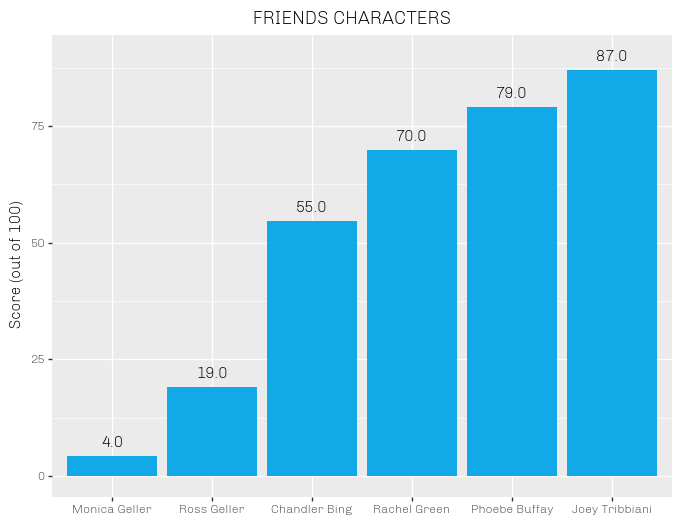

<ggplot: (393133600)>

In [31]:
(ggplot(data=friends, mapping=aes(x='reorder(char_name,messy)',y='messy'))+
 #for fill and color mappings, we can either use generic color names, e.g. blue, or hex values
 geom_col(fill='#12A9E9')+
 #adjust text slightly above bar chart, we can do this by creating a calculation for our mapping, e.g. value + x
 geom_text(mapping=aes(label="round(messy,0)",y='messy+3'))+
 #adjust plot titles and labels with labs
 labs(x="", y="Score (out of 100)", title="FRIENDS CHARACTERS")+
 theme(figure_size=[8,6],
       text= element_text(family="Chivo")
     )
)

## 3.3. Advanced Bar Plot

Let's add some lipstick to our bar plot. We can adjust the look and feel by creating our custom `theme`. 

For themes, we can adjust individual components with specific element types. These element types include:
- `element_line` - modify lines, e.g. gridlines
- `element_text` - modify text
- `element_rect` - used for borders and backgrounds
- `element_blank` - remove objects, e.g. remove text or gridlines

We'll also use two other tricks: 
1. adjust `scale_y_continuous` to expand the y axis limit to 100 
2.  implement ggplot `annotate` to call out an observation.

**Note, there are also out-of-the-box themes that are available with default settings, you can see a list of them [here](https://plotnine.readthedocs.io/en/stable/api.html#themes).*

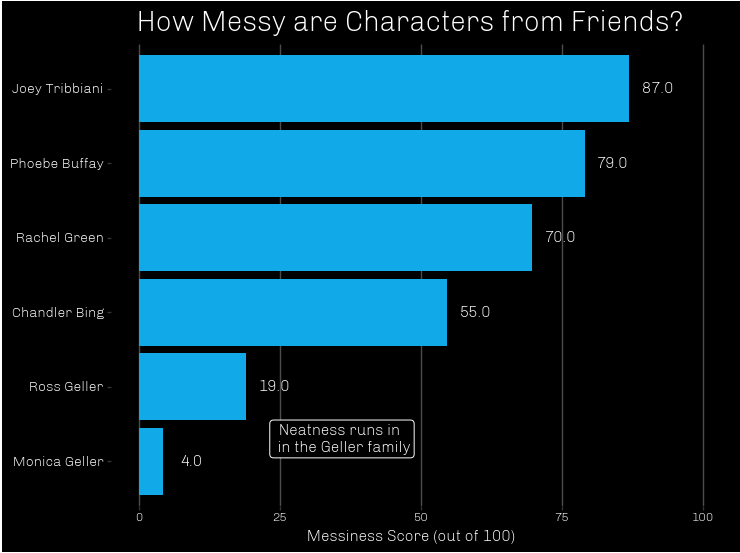

<ggplot: (393227358)>

In [45]:
final_bar = (ggplot(data=friends, mapping=aes(x='reorder(char_name,messy)',y='messy'))+
 #bar plot
 geom_col(fill='#12A9E9')+
 geom_text(mapping=aes(label="round(messy,0)",y='messy+5'), color="white")+
 #annotate can adopt a geom_text or geom_label style, we can map x and y independelty from our data
 annotate(geom="label", fill="black", color="white", label = "Neatness runs in \n in the Geller family", y=36, x=1.3)+
 #set limits with scale_y_continuous, limits stored in a list
 scale_y_continuous(limits=[0,100])+
 #to flip bar plot, we can reverse x & y mapping with coord_flip()
 coord_flip()+
 labs(x="", y="Messiness Score (out of 100)", title="How Messy are Characters from Friends?")+
 #adjust plot style with theme
 theme(figure_size=[8,6],
       panel_background=element_rect(fill="black"),
       plot_background = element_rect(fill="black"),
       plot_title = element_text(size=20, family="Chivo"),
       axis_text_y= element_text(size=10, va="center"),
       text = element_text(color="white", family="Chivo"),
       panel_grid = element_blank(),
       panel_grid_major_x = element_line(color="grey", alpha=0.6)
      )
)

final_bar

#to save ggplot uncomment code below (if working on local directory). dpi used to adjust resolution.
#ggsave(plot=final_bar, filename='friends_bar_plot.png', dpi=300)

# 4. Scatter Plot
---

Scatter plots are a great way of visualizing relationships between two continuous variables. We create a scatter plot with `geom_point`.

For this example, let's take a look at **Game of Thrones** characters and compare ratings for altruisim vs. cunningness. We'll create a new field, *house*, based on characters last name.

<figure align="center">
<img src="https://watchersonthewall.com/wp-content/uploads/2017/08/707-Kings-Landing-Dragonpit-Brienne-Jaime-1.jpg" width=400>
<figcaption>On that note, I will never understand the friendship between these two - Jamie Lannister and Brienne of Tarth. </figcaption>
</figure>

In [46]:
#get rows only for Game of Thrones characters
got = pivoted[pivoted['uni_name']=="Game of Thrones"]
#create new column for House (based on last name)
main_houses = ['Stark','Lannister','Greyjoy','Targaryen','Baratheon']
got['house']= [name.split(" ")[-1] for name in got['char_name']]
got['house'] = np.where(got['house'].isin(main_houses), got['house'],np.nan)
#create first name for plot labels later
got['first_name']= [name.split(" ")[0] for name in got['char_name']]

got.head(3)

/var/folders/7h/16mh48vj4djbv5nm9q8346c00000gp/T/ipykernel_2207/128187897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/7h/16mh48vj4djbv5nm9q8346c00000gp/T/ipykernel_2207/128187897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/7h/16mh48vj4djbv5nm9q8346c00000gp/T/ipykernel_2207/128187897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

outcome_1,char_name,uni_name,altruistic,bold,cunning,diligent,dominant,dunce,foolish,messy,optimistic,house,first_name
63,Arya Stark,Game of Thrones,58.3,93.0,67.4,92.0,93.1,17.4,32.1,62.0,44.1,Stark,Arya
64,Asha Greyjoy,Game of Thrones,54.3,89.8,44.6,88.4,92.3,37.0,32.0,67.8,40.8,Greyjoy,Asha
113,Brandon Stark,Game of Thrones,67.7,50.1,43.0,71.6,49.4,22.4,20.5,32.8,37.7,Stark,Brandon


## 4.1. Basic Scatter Plot

Using `geom_point`, plot the rating values for *cunning* and *alruistic* characteristics. Set the fill value to a character's *house*.

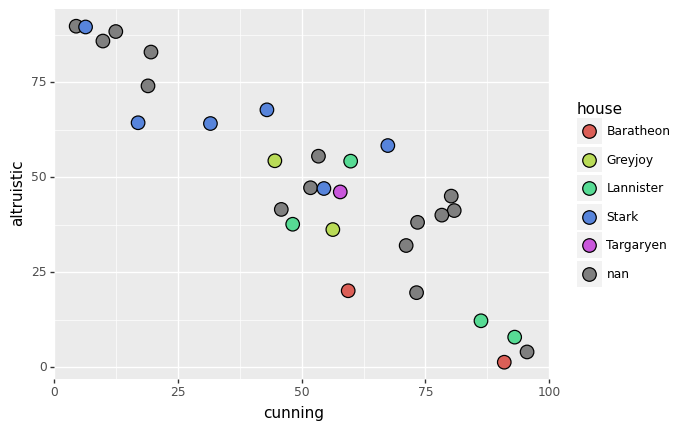

<ggplot: (401919340)>

In [34]:
#create a basic scatter plot
(ggplot(got, aes(x='cunning',y='altruistic',fill='house'))+
 geom_point(size=5)
)

## 4.2. Next Level Scatter Plot

Now to make some adjustments. In this step let's make the following changes:

- Adjust the x and y axis to show limits from 0-100 with `scale_x_continuous` and `scale_y_continuous`
- Change the size to map it to *genius* characteristic (invert by mapping to 100-*dunce*)
- Modify size scale with new ranges and breaks `scale_size_continuous`
- Switch up the fill colors (`scale_fill_manual`)

You are welcome to modify the colors to any select list. For this example, I've used [Coolors](https://coolors.co/) palette generator. To make it simple you can copy the following: "#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"

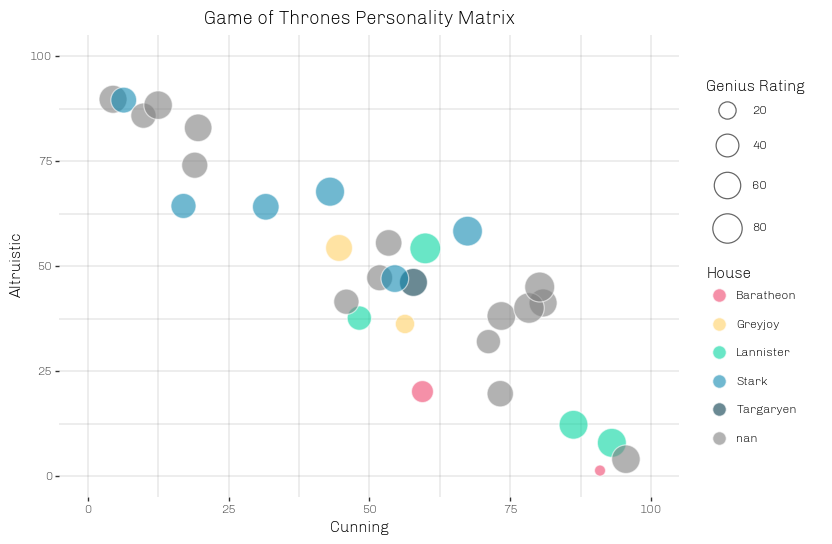

<ggplot: (401646586)>

In [35]:
(ggplot(got, aes(x='cunning',y='altruistic',fill='house'))+
 geom_point(mapping=aes(size="100-dunce"), alpha=0.6, color="white")+
 #adjust x and y axis, range from 0 to 100
 scale_y_continuous(limits=[0,100])+
 scale_x_continuous(limits=[0,100])+
 #adjust scale size and fill values
 scale_size_continuous(range=[4,12], breaks=[10,20,40,60,80])+
 scale_fill_manual(values=["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"], na_value="grey")+
 labs(size="Genius Rating", fill="House", title="Game of Thrones Personality Matrix", y="Altruistic", x="Cunning")+
 #adjust legend formatting with guides
 guides(
     size = guide_legend(override_aes={'color':'black', 'fill':'white'}),
     fill = guide_legend(override_aes={'size':5})
 )+
 theme(figure_size = [8,6],
       legend_position="right",
       legend_key=element_blank(),
       panel_background = element_rect(fill="white"),
       text = element_text(family="Chivo"),
       panel_grid = element_line(color="grey", size=.2)
       )
)

## 4.3. Advanced Scatter Plot

Example of how to level it up with a few more tweaks.

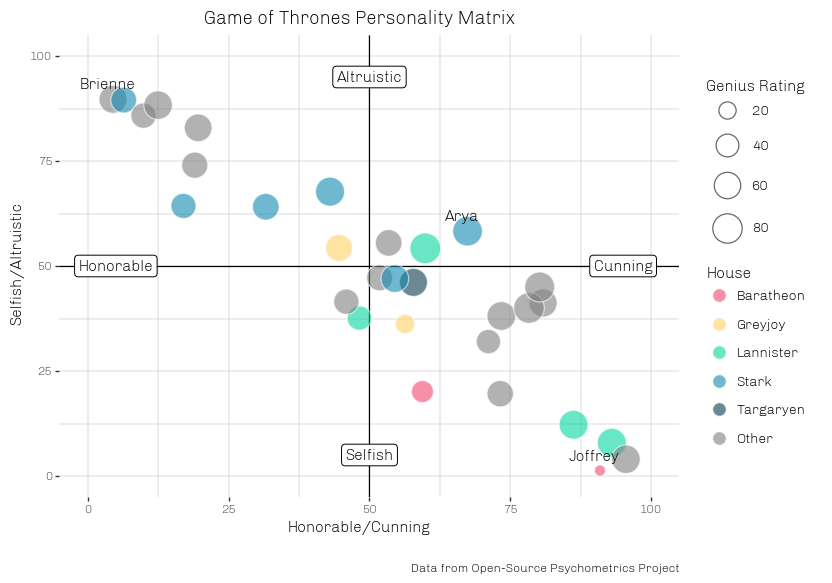

<ggplot: (682945687)>

In [48]:
got_sub = got[got['char_name'].isin(['Joffrey Baratheon','Arya Stark','Brienne of Tarth'])]

scatter_final = (ggplot(got, aes(x='cunning',y='altruistic', fill="house"))+
 #create cross lines with geom_hline and geom_vline
 geom_hline(yintercept=50)+
 geom_vline(xintercept=50)+
 #annotate using labels for extreme ends of axis
 annotate(geom = "label", label = "Cunning", x=95, y=50)+
 annotate(geom = "label", label = "Honorable", x=5, y=50)+
 annotate(geom = "label", label = "Altruistic", x=50, y=95, ha="center")+
 annotate(geom = "label", label = "Selfish", x=50, y=5, ha="center")+
 #scatter plot
 geom_point(mapping=aes(size="100-dunce"), alpha=0.6, color="white")+
 #text for specific characters
 geom_text(data=got_sub, mapping=aes(x="cunning-1",y="altruistic+3.5", label="first_name"), inherit_aes=False)+
 #adjust scale limits 0-100 for each axis
 scale_y_continuous(limits=[0,100])+
 scale_x_continuous(limits=[0,100])+
 #adjust scale size and fill values
 scale_size_continuous(range=[4,12], breaks=[10,20,40,60,80])+
 scale_fill_manual(values=["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"], na_value="grey",
                   labels=['Baratheon','Greyjoy',"Lannister","Stark","Targaryen","Other"])+
 #tweak legend with guides
 guides(
     size = guide_legend(override_aes={'color':'black', 'fill':'white'}),
     fill = guide_legend(override_aes={'size':5})
 )+
 #plot labels
 labs(size="Genius Rating", 
      fill="House", 
      title="Game of Thrones Personality Matrix", 
      caption="Data from Open-Source Psychometrics Project",
      y="Selfish/Altruistic", x="Honorable/Cunning")+
 #themes
 theme(figure_size = [8,6],
       legend_position="right",
       legend_key=element_blank(),
       legend_text_legend = element_text(size=10),
       panel_background = element_rect(fill="white"),
       text = element_text(family="Chivo"),
       panel_grid = element_line(color="grey", size=.2))
)

scatter_final

#to save ggplot uncomment code below (if working on local directory). dpi used to adjust resolution.
#ggsave(plot=scatter_final, filename='got_scatter_plot.png', dpi=300)

# 5. Density Plot & Facetting
---

What if we wanted to create a plot and pivot it by a specific dimension? With some data visualization libraries, you might have to create a loop to generate each plot. With ggplot, we can implement `facet_wrap` to automatically *pivot* our plots. 

<figure align="center">
<img src="https://c.tenor.com/KM08WXoXpjgAAAAM/friends-ross.gif" 
width=400>
<figcaption>I just can't get enough of Friends...Ross Geller and the infamous "pivot" scene. </figcaption>
</figure>

Let's try it out with our original **subset** dataset. What does the distribution of ratings look for each variable?

In [51]:
#use subset data to visualize the distribution of scores for different characteristics
facet_plot = (ggplot(data=subset, mapping=aes(x="rating"))+
 geom_density(mapping=aes(fill="outcome_1", color="outcome_1"), alpha=0.6, show_legend=False)+
 facet_wrap("outcome_1")+
 labs(title="Distribution of Character Personality Ratings",
      x="Rating (out of 100)",
      y="")+
 theme_seaborn()+
 theme(figure_size=[10,9],
       text = element_text(family="Chivo"),
       plot_title=element_text(weight="bold", size=12))
)

facet_plot

#to save ggplot uncomment code below (if working on local directory). dpi used to adjust resolution.
ggsave(plot=facet_plot, filename='facet_plot.png', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 9 in image.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: facet_plot.png


# Try Your Own Plots
---
And that's a wrap! But don't stop here, this is just the beginning.

Using the dataset from our workshop, create your own plot with plotnine. 

There are tons of different geoms to explore outside of the ones we used today, you can see the full list [here](https://plotnine.readthedocs.io/en/stable/api.html#geoms).

In [38]:
#create your own plot